## Resolucion de una integral basica usando el metodo de Simpson y el metodo del Trapecio

In [ ]:
#ejercicio 1
import numpy as np
import matplotlib.pyplot as plt
#condiciones iniciales
a = 0.001
b = 3
n = 1000
h=(b-a)/n
x=np.linspace(a,b, n)

# Definimos la función f(x)
def f(t):
    return np.exp(-t**2)

#definimos el metodo del trapecio
def Trapecio(f, a, b, n):
    h = (b - a) / n
    S = 0
    for k in range(1, n):
        S += f(a + k * h)
    I = h * ((0.5) * (f(a) + f(b)) + S)
    return I
#resultado con trapecio
int_trapecio = Trapecio(f, a, b, n)
print('La integral usando el metodo del trapecio es:',int_trapecio)

#definimos el metodo simpson
def simpson(f,a,b,n):
  h=abs(b-a)/n
  s_p,s_i=0,0
  for i in range(2,n-1,2): #suma de pares
    s_p+=f(a+i*h)
  for i in range(1,n,2): #suma de impares
    s_i+=f(a+i*h)
  I=h/3*(f(a)+f(b)+2*s_p+4*s_i)
  return I
#resultado con simpson
int_simpson = simpson(f, a, b, n)
print('La integral usando el metodo de simpson es:',int_simpson)

La integral usando el metodo del trapecio es: 0.8852073495368845
La integral usando el metodo de simpson es: 0.8852073485928394


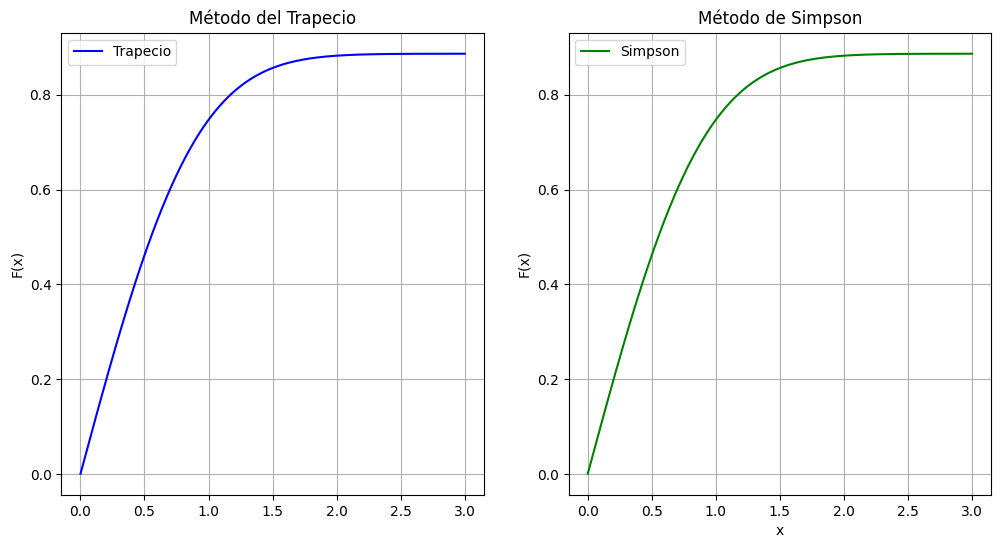

In [ ]:
# Gráfica de subplots para ver ambas graficas (ya que son practicamente iguales)
graf_trap= np.zeros_like(x) #se usa para que ambas funciones tengan la misma dimension
graf_simp= np.zeros_like(x)
for i in range(len(x)): #iteramos para la longitud de x (0 a 3)
    graf_trap[i] = Trapecio(f, 0, x[i], n)  # Integral de 0 a x[i]
    graf_simp[i] = simpson(f, 0, x[i], n)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Gráfico del método del trapecio
ax1.plot(x, graf_trap, color='b')
ax1.set_title('Método del Trapecio')
ax1.set_ylabel('F(x)')
ax1.grid()

# Gráfico del método de Simpson
ax2.plot(x, graf_simp, color='g')
ax2.set_title('Método de Simpson')
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.grid()
plt.show()

## Modelo de crecimiento de
Se resolvio usando los metodos de Runge Kutta 2 y 4

In [ ]:
#ejercicio 2

alphas = [0.1, 0.5, 0.7]
s = 0.15
delta = 0.07
n = 0.025
k0=1.5

t0 = 0
tf = 50
h = 0.01
#t = np.linspace(t0, tf+h)
t = np.arange(0, tf + h, h)

#ecuacion dada
def deriv_k(k, alpha, s, delta, n):
    return s * (k**alpha) - (delta + n) * k

#estado estacionario
def ec_k(alpha):
    return (s/(delta + n))**(1/1-alpha)


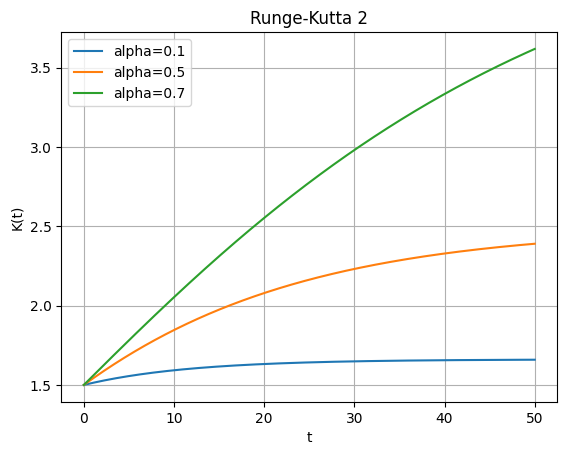

In [ ]:
def rk2(k0, t, alpha, s, delta, n, h):
    k = np.zeros(len(t))
    k[0] = k0 #valor incial de k0
    for i in range(1, len(t)): #desde tiempo 1 hasta 50
        k1 = h * deriv_k(k[i-1], alpha, s, delta, n)
        k2 = h * deriv_k(k[i-1] + k1, alpha, s, delta, n)
        k[i] = k[i-1] + (k1 + k2) / 2
    return k
#para la grafica
for alpha in alphas: #iteramos en todas las alphas
    K_rk2=rk2(k0, t, alpha, s, delta, n, h)
    plt.plot(t, K_rk2, label=f'alpha={alpha}') #mostramos la grafica
plt.xlabel('t')
plt.ylabel('K(t)')
plt.title('Runge-Kutta 2')
plt.legend()
plt.grid()
plt.show()

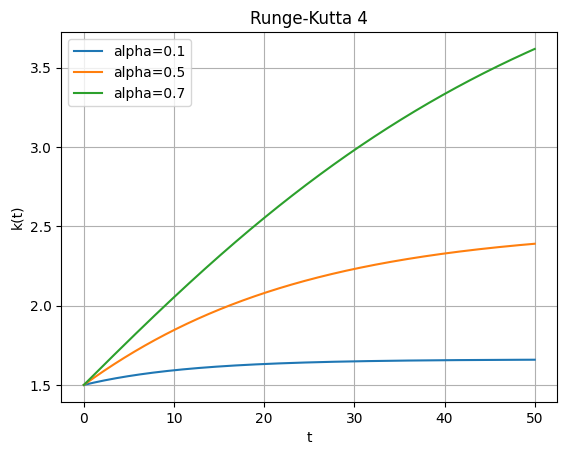

In [ ]:
# Método de Runge-Kutta 4
def rk4(k0, t, alpha, s, delta, n, h):
    k = np.zeros(len(t))
    k[0] = k0
    for i in range(1, len(t)):
        k1 = h * deriv_k(k[i-1], alpha, s, delta, n)
        k2 = h * deriv_k(k[i-1] + k1/2, alpha, s, delta, n)
        k3 = h * deriv_k(k[i-1] + k2/2, alpha, s, delta, n)
        k4 = h * deriv_k(k[i-1] + k3, alpha, s, delta, n)
        k[i] = k[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return k

#mismo procedimiento
for alpha in alphas:
    K_rk4=rk4(k0, t, alpha, s, delta, n, h)
    plt.plot(t, K_rk4, label=f'alpha={alpha}') #etiqueta de cada grafica en la iteracion

plt.xlabel('t')
plt.ylabel('k(t)')
plt.title('Runge-Kutta 4')
plt.legend()
plt.grid()
plt.show()

## Calculo de la presion de un gas de electrones en un cristal de cobre, usando la funcion polilogaritmica de Fermi y una funcion gamma con condiciones dadas
Se resolvio usando metodo de Simpson y se comparo con la presion del gas ideal

In [ ]:
#Ejercicio 3 a)
kB = 1.38e-23
mu = 1.1215e-18
me = 9.1e-31
h = 6.62e-34
s = 0.5
n=1000
#gamma evaluada en 5/2 utilizando simpson
def gamma():
    f = lambda t: t**(1.5) * np.exp(-t)
    return simpson(f, 0, 100, n)

# f_5/2(alpha) usando tu Simpson
def f_ev(alpha):
    f = lambda x: x**(1.5) / (np.exp(x - alpha) + 1)
    integral = simpson(f, 0, 100, n)
    return integral / gamma()

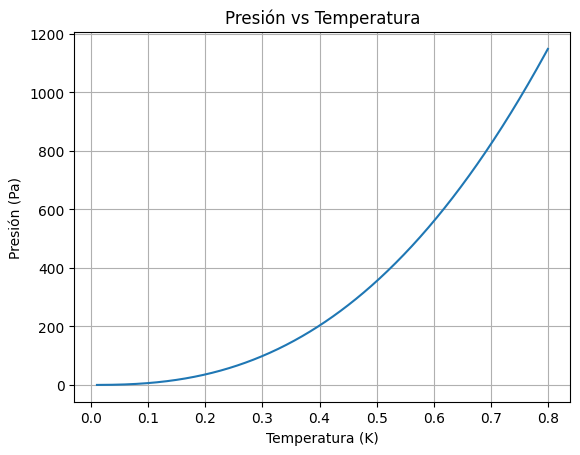

In [ ]:
T_val = np.linspace(0.01, 0.8, n)
p_val = []

# Cálculamos la presion
for T in T_val:
    alpha = mu / (kB * T)
    lambda_T = h / np.sqrt(2 * np.pi * me * kB * T)
    f5 = f_ev(alpha)
    p = kB * T * (2 * s + 1) / lambda_T**3 * f5 #relacion compleja que en este caso nos da una parabola
    p_val.append(p)

# Graficamos
plt.plot(T_val, p_val)
plt.xlabel('Temperatura (K)')
plt.ylabel('Presión (Pa)')
plt.title('Presión vs Temperatura')
plt.grid()
plt.show()


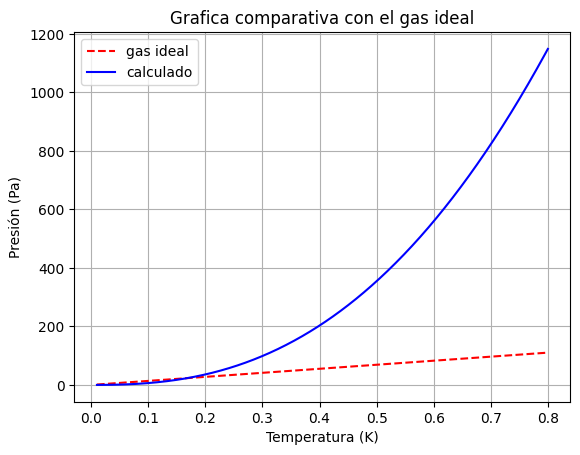

In [ ]:
N=10e24
p_real=[]
for T in T_val:
  p_r= N*kB*T #relacion lineal
  p_real.append(p_r)

plt.plot(T_val, p_real, color='r', linestyle='--',label='gas ideal' )
plt.plot(T_val, p_val, color='b', label='calculado' )
plt.xlabel('Temperatura (K)')
plt.ylabel('Presión (Pa)')
plt.title('Grafica comparativa con el gas ideal')
plt.grid()
plt.legend()
plt.show()